# Info
Name: Seyed Ali Mirferdos

Student ID: 99201465

# 0. Importing the necessary modules

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

# 1. Part 1:

In [ ]:
!gdown --id 1oRmkmOMD5t_vA35N8IBmFcQM-WfE0_7x

Downloading...
From: https://drive.google.com/uc?id=1oRmkmOMD5t_vA35N8IBmFcQM-WfE0_7x
To: /content/bill_authentication.csv
100% 46.4k/46.4k [00:00<00:00, 71.5MB/s]


## 1.1. Loading the dataset

In [ ]:
df = pd.read_csv('bill_authentication.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


*   There are 4 feature columns with float data type and a target column with data type of int.
*   There are 1372 entries.
*   We have no missing data.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


There are only 2 classes indicating whether the input is fake or not.

In [ ]:
df['Class'].unique()

array([0, 1])

## 1.2. Plotting the data

The following graph shows the Variance vs. Skewness. We can observe the following characteristics:

*   Most of True banknotes have a negative Variance but the Skewness is spread along the true banknotes.
*   Most of Fake banknotes have a positive Variance and also a positive Skewness.
*   There's a small overlap between the two classes but the overlap isn't that much. We can use a soft margine SVM with a polynomial kernel to get a smooth classification. However, a linear kernel stil can output a reasonable answer based on these two features.

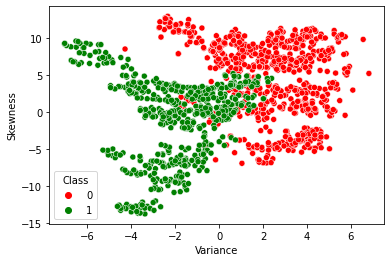

In [ ]:
sns.scatterplot(data=df, x="Variance", y="Skewness", hue="Class", 
                palette=['red', 'green'])

The following graph shows the Variance vs. Curtosis. We can observe the following characteristics:

*   As before, most of True banknotes have a negative Variance but the Curtosis is spread along the true banknotes.
*   Also most of Fake banknotes have a positive Variance but we can't conclude about the positivity of Curtosis among them.
*   We can also see an overlap between the two classes. The overlap seems more than the previous graph but it still isn't that much. A linear kernel would output an answer with a huge amount of tolerance.

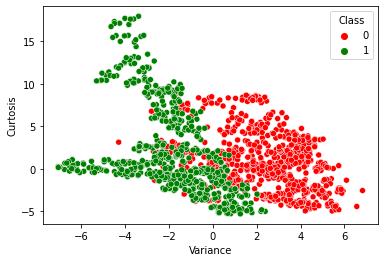

In [ ]:
sns.scatterplot(data=df, x="Variance", y="Curtosis", hue="Class", 
                palette=['red', 'green'])

The following graph shows the Variance vs. Entropy. We can observe the following characteristics:

*   The observation about Variance still stays as before.
*   Entropy is spread along the true and fake banknotes.
*   The overlap isn't that much but the distance between the lower points of True banknotes and the higher ones is very much making it hard for a linear SVM classifier to predict.

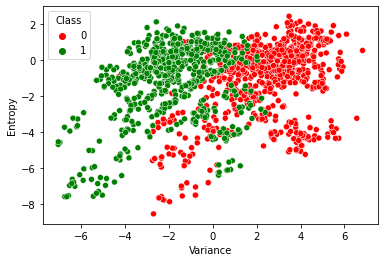

In [ ]:
sns.scatterplot(data=df, x="Variance", y="Entropy", hue="Class", 
                palette=['red', 'green'])

The following graph shows the Skewness vs. Curtosis. We can observe the following characteristics:

*   Both the Skewness and the Curtosis are spread along the two classes.
*   The two classes are very interwoven and it'll be almost impossible for the linear classifier to predict them.

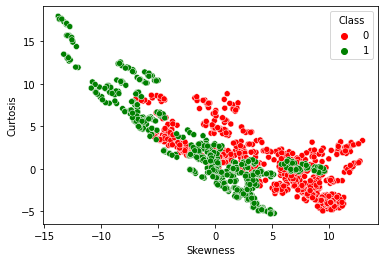

In [ ]:
sns.scatterplot(data=df, x="Skewness", y="Curtosis", hue="Class", 
                palette=['red', 'green'])

The following graph shows the Skewness vs. Entropy. We can observe the following characteristics:

*   Both the Skewness and the Entropy are spread along the two classes.
*   The two graphs have a similar shape. Like the previous graph, the two classes are very interwoven and it'll be almost impossible for the linear classifier to predict them.

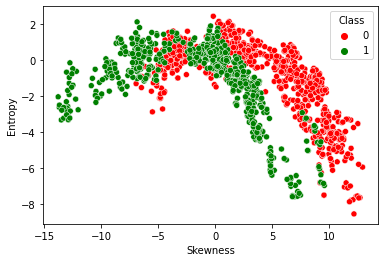

In [ ]:
sns.scatterplot(data=df, x="Skewness", y="Entropy", hue="Class", 
                palette=['red', 'green'])

The following graph shows the Curtosis vs. Entropy. We can observe the following characteristics:

*   Both the Entropy and the Curtosis are spread along the two classes.
*   The two classes in this graph have the most overlap between all of the 6 graphs. It'll be impossible for the linear classifier to predict them.

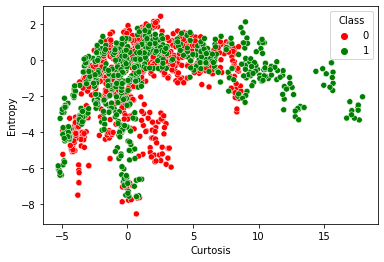

In [ ]:
sns.scatterplot(data=df, x="Curtosis", y="Entropy", hue="Class", 
                palette=['red', 'green'])

## 1.3. Creating the x and y datasets

In [ ]:
X = df.drop(['Class'], axis=1)
y = df[['Class']]

In [ ]:
X.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


## 1.4. Splitting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 2. Part 2:

## 2.1. Creating a Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## 2.2. Predicting the result for the test set

In [ ]:
y_pred = clf.predict(X_test)

## 2.3. Evaluating the model

*   The precision for the Fake class is higher and also the recall for the Real class correspondigly. The percentage is almost the same for other pairs.
*   The f1-score, accuracy, and the averages are the all same.
*   The number of Fake data points is more than the Real ones.
*   There's a higher ratio for TP than TN.
*   Also there's a higher ratio for FN than FP. As we saw in the Variance vs. Skewness graph, there were more real banknotes inside the fake banknotes area.

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))

              precision    recall  f1-score   support

        Fake       0.97      0.99      0.98       148
        Real       0.99      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [ ]:
print(confusion_matrix(y_test, y_pred, normalize='true'))

[[0.99324324 0.00675676]
 [0.03937008 0.96062992]]


# 3. Part 3:

## 3.1. Creating a SVC Classifier

In [ ]:
clf2 = SVC(kernel='linear')
clf2.fit(X_train, y_train['Class'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 3.2. Predicting the result for the test set

In [ ]:
y_pred2 = clf2.predict(X_test)

## 3.3. Evaluating the model

*   The precision and recall and f1-score for the Fake class are higher.
*   The accuracy and the averages are the all same.
*   The number of Fake data points is more than the Real ones.
*   There's almost a same ratio for TP and TN.
*   Also there's a higher ratio for FN than FP but still the difference isn't too much.

In [ ]:
print(classification_report(y_test, y_pred2, target_names=['Fake', 'Real']))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99       148
        Real       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
print(confusion_matrix(y_test, y_pred2, normalize='true'))

[[0.98648649 0.01351351]
 [0.01574803 0.98425197]]


In [ ]:
[[0.99324324 0.00675676]
 [0.03937008 0.96062992]]

## 3.4. Comparison

*   For the Fake class, decision tree has a lower precision and f1-score than the linear SVM.
*   For the Real class, decision tree has a lower recall and f1-score than the linear SVM but a higher precision.
*   The SVM has yielded a greater amount of accuracy.
*   The decision tree has a higher TP but a lower TN ratio than the SVM. However, the difference between the TNs is more than the TPs.
*   The decision tree has a very smaller FP but a higher FN ratio than the SVM. However, the difference between the FPs is significant.

---

For this dataset, the linear SVM has achieved a better performance concerning the f1-score and accuracy. The two models almost achieved the same TP and TN ratios although the SVM has a more balanced ratios. Also the decision tree has a very smaller FP ratio which would be a considerable parameter to focus when dealing with banknotes. 

Overall, we can say although the SVM has a better classification results, but as there's much more focus in the FP in this specific task, going with the decision tree would lower the risks and increase the satisfaction of users.